# SVM

from sklearn.svm import SVC

# SVC for Classification

from sklearn.svm import SVR

# SVR for Regression

0

As usual always refer skiean official documentation if you are not sure about syntax or parameter

bups://scikit-leam.org

# Introduction

Support Vector Machine is a supervised Machine Learning algorithm widely used for soiving different machine learning problems. Given a dataset, the algorithm tries to divide the data using hyperpianos and then makes the predictions, SVM is a non-probabilistic linear classifier While other classifiers, when classifying, predict the probability of a data point to belong to one group or the another, SVM directly says to which group the datapoint belongs to without using any probability calculation.

# Understanding the Mathematics involved

Let's take the example of the following dataset and see now can we divide the data into appropriate groups.

Python Silpykemeu

A

We can see that there are two groups of data. The question is how to divide these points into two groups. It can be done using any of the three lines. Or, for that purpose, there can be an infinite number of straight lines that can divide these points into two classes. Now, which line to choose? SVM solves this problem using the maximum margin as shown

The black line in the middle is the optimum classifier. This line is drawn to maximise the distance of the classifier line from the nearest points in the two classes. It is also called a hyperplane in terms of SVM. A Hyperplane is an n-1 dimensional plane which optimally divides the data of n dimensions. Hore, as we have only a 2-D data, so the hyperplane can be represented using one dimension only. Hence, the hyporplane is a line here. The two points (highlighted with circles) which are on the yellow lines, they are called the support vectors. As it is a 2-D figure, they are points, in a multi-dimensional space, they will be vectors, and hence, the name- support vector machine as the aigorithm creates the optimum classification line by maximising its distance from the two support vectors.

When the data is not linearly separable, then to create a hyperplane to separate data into different groups, the SVM algorithm needs to perform computations in a higher-dimensional space. But the introduction of new dimensions makes the computations for the SVMs more intensive, which impacts the algorithm performance. To rectify this, mathematicians came up with the approach of Kernel methods. Kernei methods use kernel functions available in mathematics. The unique feature of a kernel function is to compute in a higher-dimensional space without caiculating the new coordinates in that higher dimension, It Implicitly uses prodefined mathematical functions to do operations on the existing points which mimic the computation in a higher-dimensional space without adding to the computation cost as they are not actually calculating the coordinates in the higher dimension thereby avoiding the computation of calculating distances from the newly computed points. This is called the kernel trick.

# Image: bogotobogo.com

In the left diagram above, we nave a non-linear distribution of data as we can not classify a data using a linear equation. To solve this problem, we can project the points in a 3-dimensional space and then derive a plane which divides the data into two parts. In theory, that's what a kemei function does without computing the additional coordinates for the higher dimension.

# Python Implementation

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# get the csv data here and print head
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col=0)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN


In [3]:
# print summary
print('shape------->',df.shape)
print('each column and data type and its count','\n')
print(df.info())

shape-------> (569, 32)
each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se

In [4]:
# Drop Alert 1 : Unnamed:32 column has all nulls .safe to remove the column
df=df.drop(['Unnamed: 32'],axis=1)

In [5]:
df.shape

(569, 31)

In [6]:
# dataframe statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


seems no other cols have null.its safe to proceed

as we can see each feature data scaled differently lets go ahead and scale the data

In [7]:
scaler=StandardScaler()
X=df.drop('diagnosis',axis=1)
X_scaled=scaler.fit_transform(X)

# Principal Component Analysis (PCA)

• PCA is dimension reduction technique (Not feature selection technique)

PCA can be applied only on Features (not on target)

• PCA can be applied when you have too many features and their correiation is not that significant with target.

• PCA will also takes care of multicollinearity problem

In [8]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

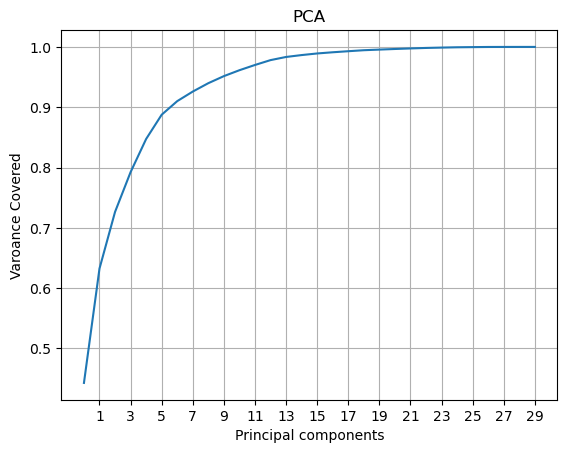

In [9]:
# lets plot scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,31,2))
plt.xlabel('Principal components')
plt.ylabel('Varoance Covered')
plt.title('PCA')
plt.show()

around 13 principal components are able to explain >95% variance its safe to consider starting 13 PC's

In [10]:
pca=PCA(n_components=13)
new_pcomp=pca.fit_transform(X_scaled)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157120,-0.877399,0.262956,-0.859018,0.103385
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240987,-0.711902,1.106991,0.813118,0.157925,-0.943524
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124389,-0.410626
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405439,-1.116976,-1.151514,1.011318,-0.933270
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636377,-0.263807,0.377707,0.651361,-0.110517,0.387945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256990,-0.062651,0.123343,-0.051725
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105206,-0.108634,0.244803,0.222754,-0.192635
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341886,0.393920,0.520872,-0.840514,0.096477,0.157425
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280238,-0.542036,-0.089294,-0.178627,-0.697462,1.225192


In [11]:
# replace label column (diagnosis) into binary codes
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})
y=df['diagnosis']

In [12]:
# data split into train and test
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.25,random_state=355)

In [13]:
def print_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n====================train result================")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")

    elif train==False:
        pred=clf.predict(x_test)
        print("\n=============test result==========")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print("\n test classification report\n",classification_report(y_test,pred,digits=2))

In [14]:
from sklearn.svm import SVC
svc=SVC()
#  svc model training and printing train and test score
svc.fit(x_train,y_train)
# call the function and pass dataset to check train and test score

print_score(svc,x_train,x_test,y_train,y_test,train=True)

print_score(svc,x_train,x_test,y_train,y_test,train=False)


====================train result================
Accuracy Score:98.12%

=============test result==========
Accuracy Score:97.90%

 test classification report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



# Similarly you can use preprocessed data and build other models and check the score

# Hyperparameter tuning



= It is a hypermeter in SVM to control error, How much error we can allow.

# C

Low C means allowing Less number of error's and

#

Large C means allowing more number of errors.

gamma Gamma decides that how much curvature we want inr. a decision boundary. Gamma ingh means more curvature. #

Garima Low means Less curvature.



In [18]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[1,5,10,20],
           'gamma':[0.001,0.01,0.02,0.002]}


In [20]:
gridsearch=GridSearchCV(svc,param_grid)
gridsearch.fit(x_train,y_train)

# best parms
gridsearch.best_params_

{'C': 5, 'gamma': 0.01}

In [21]:
# SVC model training and printing train and test score (past param update)
svc=SVC(C=5,gamma=0.01)
svc.fit(x_train,y_train)

SVC(C=5, gamma=0.01)

In [23]:
# Call the function and pass dataset to check train and test score
print_score(svc,x_train,x_test,y_train,y_test,train=True)
print_score(svc,x_train,x_test,y_train,y_test,train=False)


====================train result================
Accuracy Score:98.12%

=============test result==========
Accuracy Score:97.90%

 test classification report
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        93
           1       1.00      0.94      0.97        50

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143




# Creating Pipeline

In real world the final model is built wipipeline. We work on all preprocessing steps, do EDA, make analysis etc. Once we find all the hyperparameter and feature selection techniques etc, We use the main techniques and create pipeline. This will be clean and better flow of data through series of sequences.

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas  as pd

In [27]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [29]:
X=df.drop(['Unnamed: 32','diagnosis'],axis=1)
y=df.diagnosis
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=355)

In [33]:
pipe=Pipeline([('Scaler',StandardScaler()),# fit transform
              ('PCA',PCA(n_components=13)), # fit_transform
              ('SVM',SVC(C=7,gamma=0.01))]) # Only fit

In [34]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=13)),
                ('SVM', SVC(C=7, gamma=0.01))])

In [35]:
y_pred=pipe.predict(x_test)


In [37]:
accuracy_score(y_test,y_pred)*100

97.9020979020979

# Key Points

You need to know the execution sequence, (example - Imputation techniques should be applied before standard scaler and then PCA

You cannot use pipeline for plotting graphs and analysis.

Analysis can be done before creating a pipeline.

Do not use unnecessary methods in the Pipeline.

You can also use any encoding/imputation techniques in the pipeline like.

('Simple Imputer, Simplelmputerįstrategy=mean')), #fit_transform

('Ohe', OneHotEncoder(handle_unknown='ignore')), # fit_transform